# Un exemple simple de régression linéaire

Un jeu de données, une régression linéaire et quelques trucs bizarres. Le jeu de données est [Wine Data Set ](https://archive.ics.uci.edu/ml/datasets/wine).

In [1]:
%matplotlib inline

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Récupération des données

Le premier code récupère les données depuis Internet.

In [3]:
import pandas

In [4]:
df = pandas.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", 
                     header=None)
df.head(n=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065


In [5]:
df.shape

(178, 14)

On récupère le nom des colonnes.

In [6]:
s = "index Alcohol Malicacid Ash Alcalinityofash Magnesium Totalphenols Flavanoids"
s += " Nonflavanoidphenols Proanthocyanins Colorintensity Hue"
s += " OD280/OD315 Proline"
df.columns = s.split()
df.head().T

,0,1,2,3,4
index,1.00,1.00,1.00,1.00,1.00
Alcohol,14.23,13.20,13.16,14.37,13.24
Malicacid,1.71,1.78,2.36,1.95,2.59
Ash,2.43,2.14,2.67,2.50,2.87
Alcalinityofash,15.60,11.20,18.60,16.80,21.00
Magnesium,127.00,100.00,101.00,113.00,118.00
Totalphenols,2.80,2.65,2.80,3.85,2.80
Flavanoids,3.06,2.76,3.24,3.49,2.69
Nonflavanoidphenols,0.28,0.26,0.30,0.24,0.39
Proanthocyanins,2.29,1.28,2.81,2.18,1.82


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malicacid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinityofash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Totalphenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoidphenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


## Corrélations

On utilise le module [seaborn](https://seaborn.pydata.org/index.html) pour regarder visuellement les corrélations avec le graphe [Scatterplot Matrix](https://seaborn.pydata.org/examples/scatterplot_matrix.html).

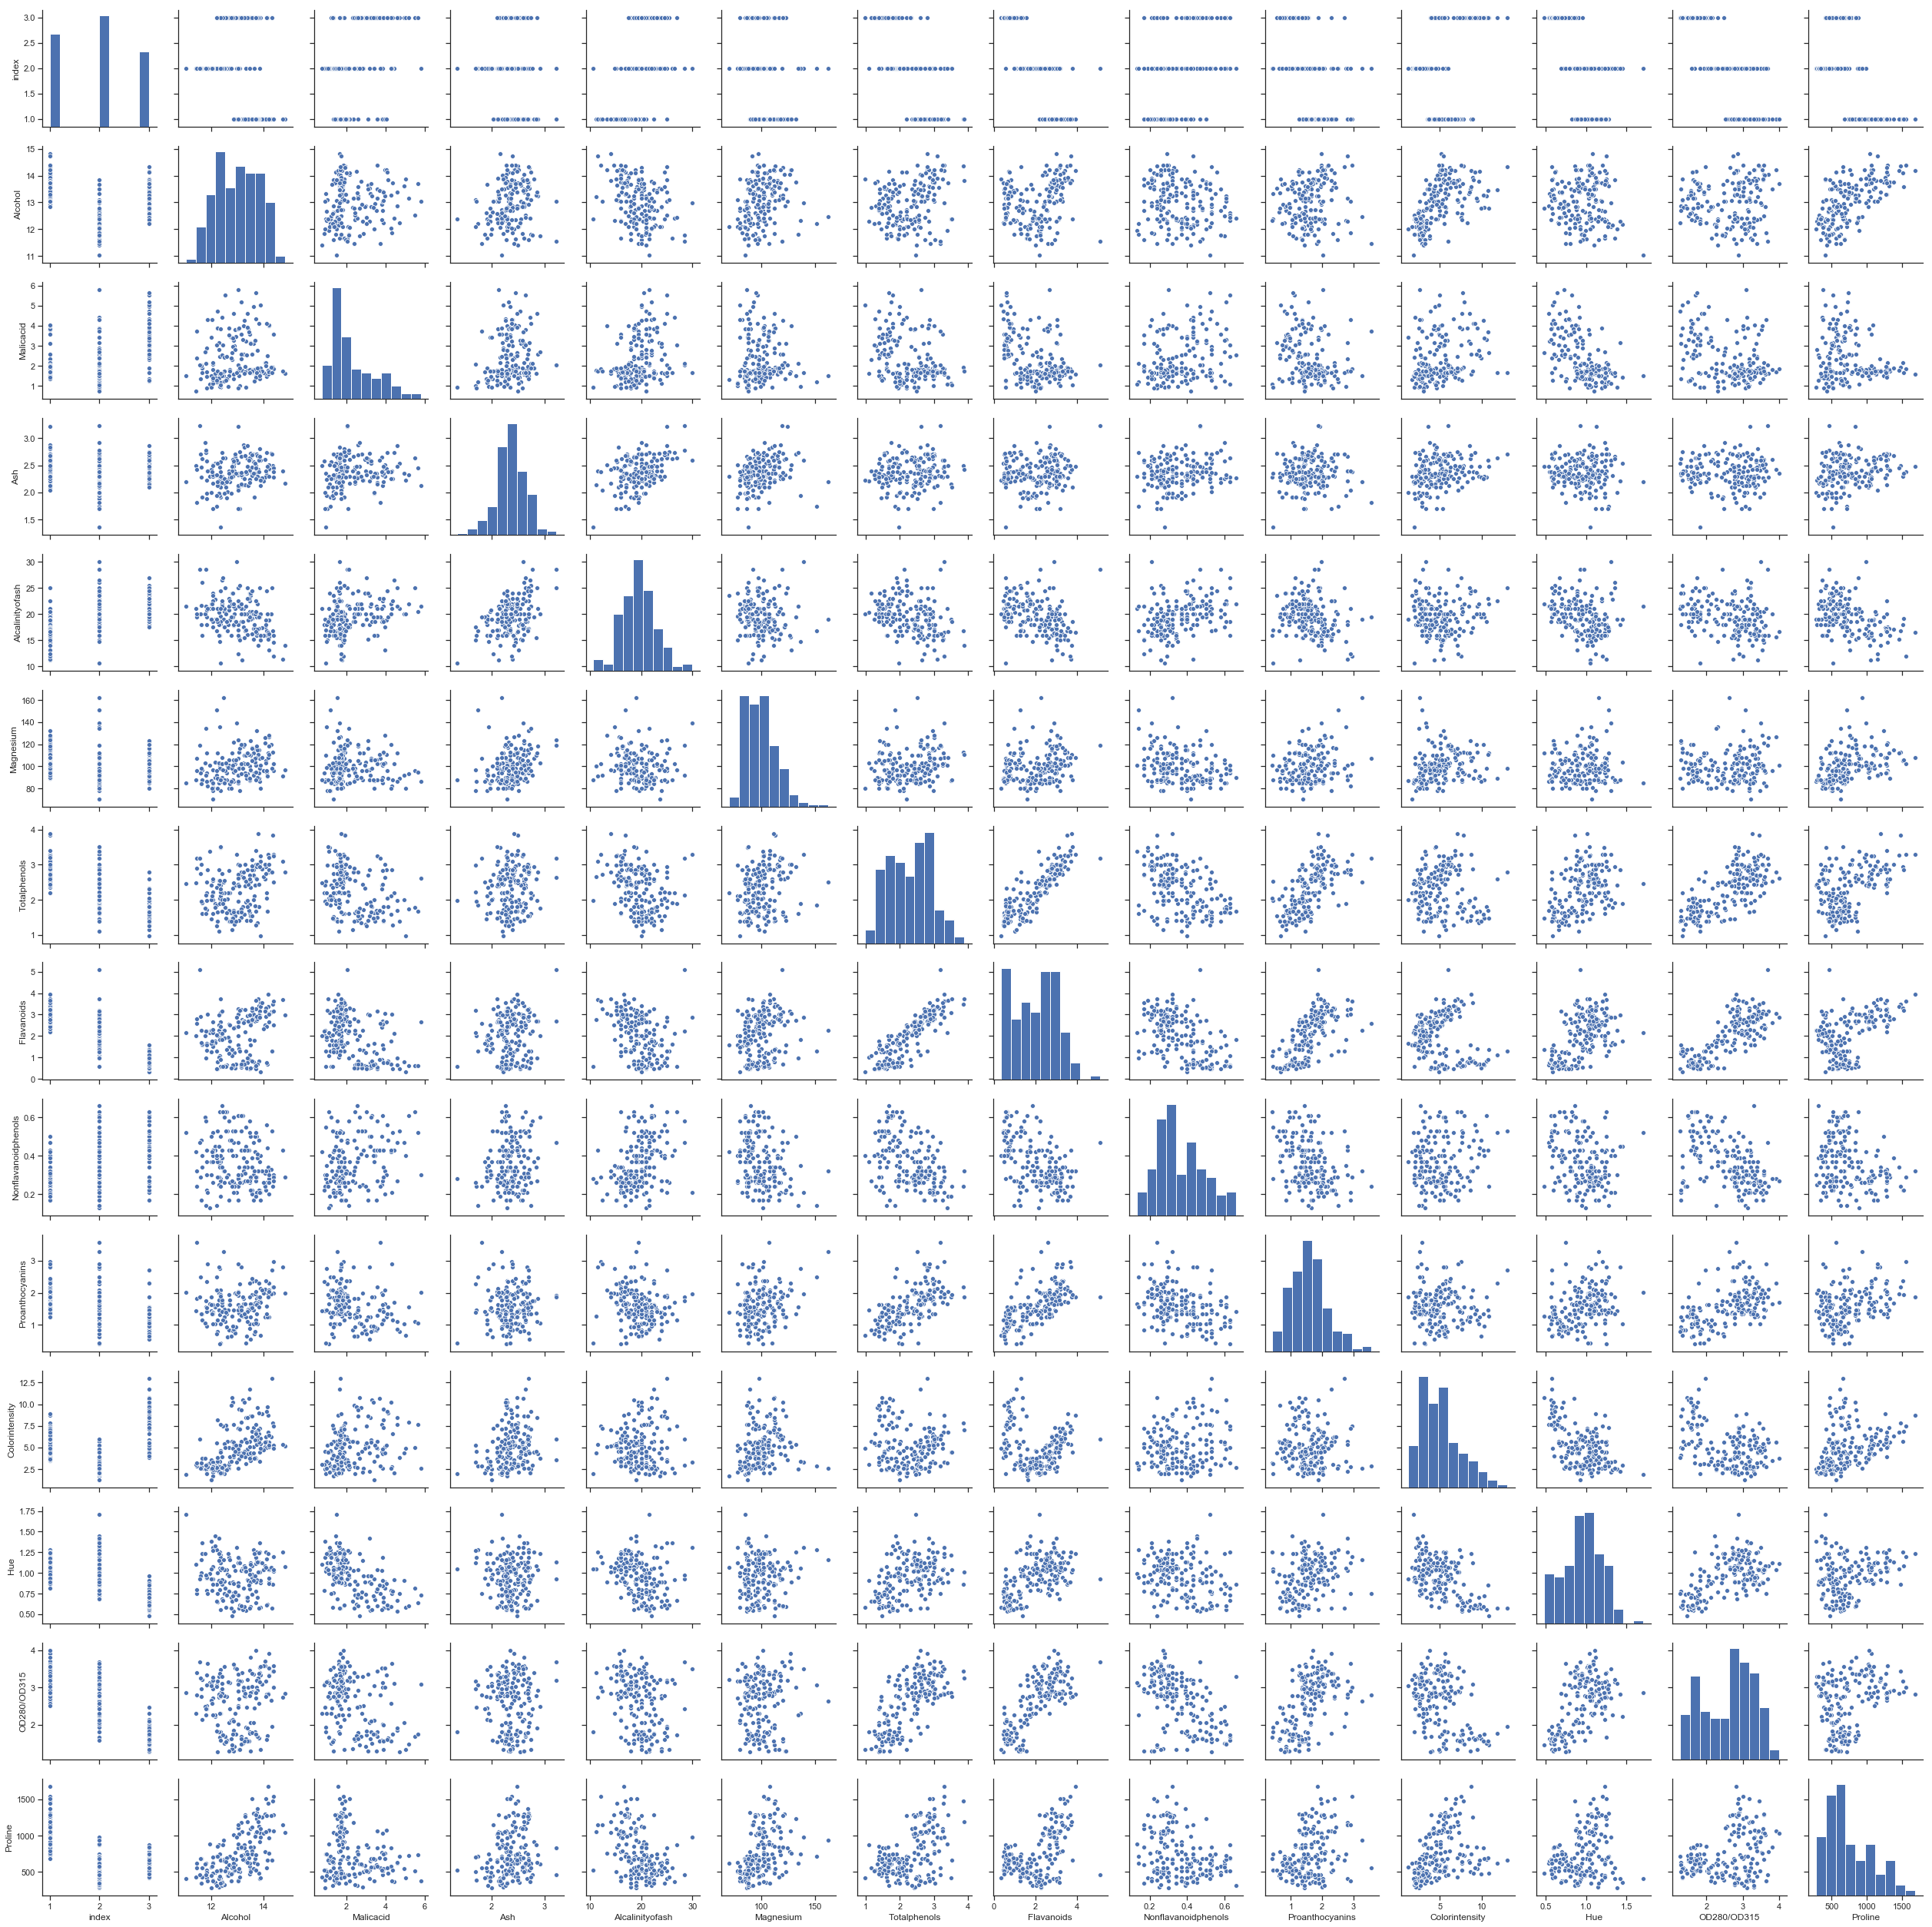

In [8]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df);

Il y a quelques corrélations.

## Première régression

On essaye de prédire le taux d'alcool du vin à partir des autres variables. 

In [9]:
X = df.drop(["Alcohol", "index"], axis=1)
y = df["Alcohol"]

On divise entre train et test pour éviter l'overfitting.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
model.coef_

array([ 1.63363895e-01,  3.94203469e-01, -6.00949512e-02, -1.19824047e-04,
        1.58697845e-01, -9.56728506e-02, -3.06298297e-01,  5.07946728e-02,
        1.38811432e-01,  1.59459210e-02,  1.64240691e-01,  8.15269173e-04])

In [16]:
from sklearn.metrics import r2_score

In [17]:
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.4649938412573541

In [18]:
y_predt = model.predict(X_train)
r2_score(y_train, y_predt)

0.6136769355983627

Même chose avec un arbre de décision.

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
dt = DecisionTreeRegressor(min_samples_leaf=10)

In [21]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [22]:
y_pred = dt.predict(X_test)
r2_score(y_test, y_pred)

0.6694565403724826

In [23]:
y_predt = dt.predict(X_train)
r2_score(y_train, y_predt)

0.7172799827093439

In [24]:
X_train.shape

(133, 12)

On vérifie avec une validation croisée.

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
cross_val_score(model, X, y, cv=5)

array([-0.51847929,  0.40456596, -0.73716381, -0.46995099, -0.47213708])

Ca oscille trop pour que cela soit vraisemblable. C'est probablement dû à l'ordre dans les données.

In [27]:
try:
    from sklearn.utils import shuffle
    df2 = shuffle(df).reset_index()
except Exception:
    import random
    index = list(df.index)
    df2 = df.iloc[index].reset_index()

In [28]:
X2 = df2.drop("Alcohol", axis=1)
y2 = df2.Alcohol
cross_val_score(model, X2, y2, cv=5)

array([0.40197927, 0.55886103, 0.57939265, 0.49028122, 0.62212365])

Beaucoup plus stable.

## Feature importance

In [29]:
dt.feature_importances_

array([0.03523663, 0.        , 0.00776046, 0.        , 0.        ,
       0.        , 0.02238126, 0.        , 0.6849213 , 0.        ,
       0.0124994 , 0.23720095])

In [30]:
ft = pandas.DataFrame(dict(name=X_train.columns, fi=dt.feature_importances_))
ft = ft.sort_values("fi", ascending=False)
ft

,name,fi
8,Colorintensity,0.684921
11,Proline,0.237201
0,Malicacid,0.035237
6,Nonflavanoidphenols,0.022381
10,OD280/OD315,0.012499
2,Alcalinityofash,0.007760
1,Ash,0.000000
3,Magnesium,0.000000
4,Totalphenols,0.000000
5,Flavanoids,0.000000


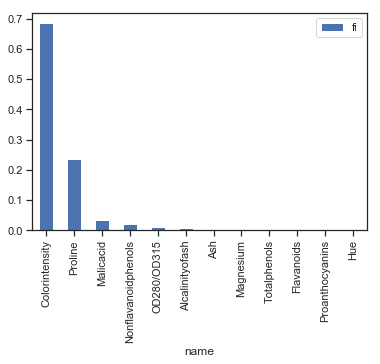

In [31]:
ft.set_index("name").plot(kind="bar");

L'intensité de la couleur a l'air de jouer un grand rôle mais dans quel sens ?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


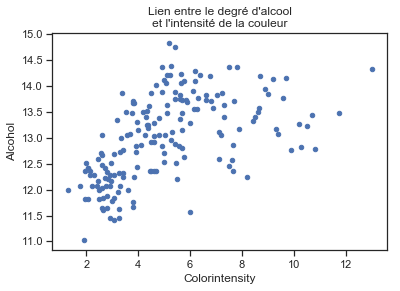

In [32]:
ax = df[["Colorintensity", "Alcohol"]].plot(x="Colorintensity", y="Alcohol", kind="scatter")
ax.set_title("Lien entre le degré d'alcool\net l'intensité de la couleur");

La relation n'est pas linéaire car le degré d'alcool montre rarement au-dessus de 14.5 mais elle paraît linéaire par morceaux.